In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

Text(0,0.5,'Magnitud')

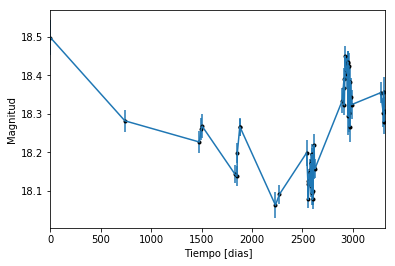

In [2]:
data = np.genfromtxt('LC_23343_Z.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

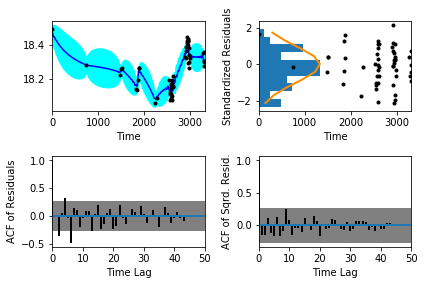

In [5]:
sample.assess_fit()

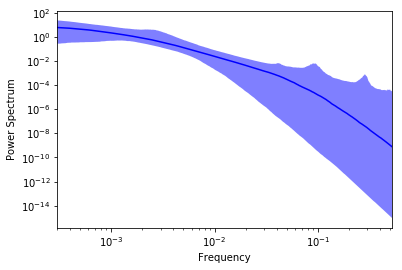

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

Text(0.000376389,0.0869379,'Medida del nivel de ruido')

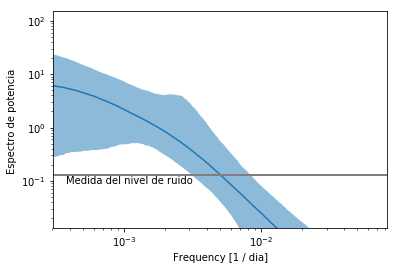

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))

Text(0.5,1,'Prediccion , valor esperado ')

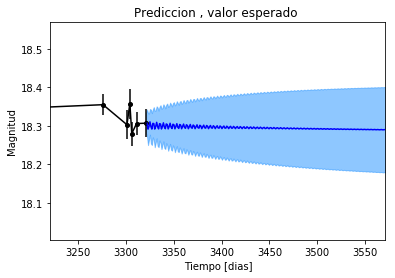

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado ')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


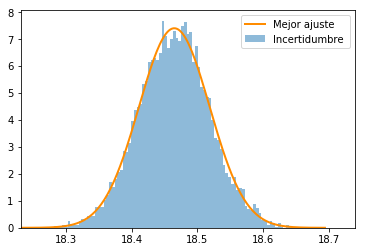

In [10]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')

Text(0.5,1,'Interpolacion, camino simulado')

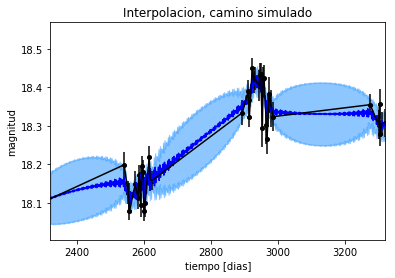

In [11]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

Text(0.5,1,'Interpolacion, camino simulado')

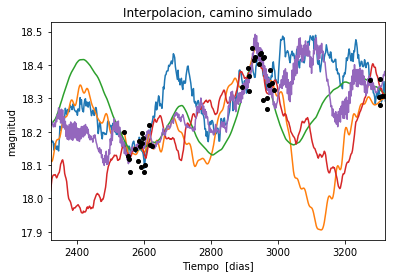

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado')

In [13]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [14]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 626.633881844
Median: 0.0154243246608
Standard deviation: 0.181287068983
68% credibility interval: [ 0.00175706  0.18568123]
95% credibility interval: [  4.51031448e-04   7.16124665e-01]
99% credibility interval: [  3.33367929e-04   9.64242805e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 763.949218798
Median: 0.00719592344183
Standard deviation: 0.0875398899649
68% credibility interval: [ 0.0008713   0.05760593]
95% credibility interval: [ 0.00036162  0.27886582]
99% credibility interval: [  3.10635225e-04   5.65775283e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 482.254050043
Median: 0.0750257305466
Standard 

In [15]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 505.847859091
Median: 98.9927310704
Standard deviation: 1.83582170866
68% credibility interval: [  97.10209405  100.42755971]
95% credibility interval: [  94.51472325  102.0724635 ]
99% credibility interval: [  92.44599821  103.18757025]


In [16]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 562.098070611
Median: 1.20410688648
Standard deviation: 2.27766990284
68% credibility interval: [ 0.15609687  4.42522735]
95% credibility interval: [ 0.03273299  7.6571171 ]
99% credibility interval: [  0.01676434  10.99828052]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 425.800440369
Median: 1.28785797912
Standard deviation: 10.5231256979
68% credibility interval: [  0.08937371  12.33571223]
95% credibility interval: [  6.90529796e

In [17]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 1254.47956217
Median: 7.82458459033e-19
Standard deviation: 1.15293303258e+88
68% credibility interval: [  1.37612120e-49   1.30399665e-03]
95% credibility interval: [  4.81117515e-87   4.04784017e+70]
99% credibility interval: [  4.19412839e-97   5.25663098e+87]


In [18]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 1548.58174287
Median: 18.2702254036
Standard deviation: 0.0586259436418
68% credibility interval: [ 18.22072413  18.32862478]
95% credibility interval: [ 18.16552853  18.3978406 ]
99% credibility interval: [ 18.11223113  18.45688142]


In [19]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 318.098322416
Median: 0.0862824091475
Standard deviation: 0.263570618778
68% credibility interval: [ 0.          0.47714383]
95% credibility interval: [ 0.          0.93709966]
99% credibility interval: [ 0.          1.02288693]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 318.098322416
Median: 0.0862824091475
Standard deviation: 0.263570618778
68% credibility interval: [ 0.          0.47714383]
95% credibility interval: [ 0.          0.93709966]
99% credibility interval: [ 0.          1.02288693]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 296.878139415
Median: 0.0
Standard deviation: 0.000856668097756
68% cr

In [20]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 505.847859091
Median: 98.9927310704
Standard deviation: 1.83582170866
68% credibility interval: [  97.10209405  100.42755971]
95% credibility interval: [  94.51472325  102.0724635 ]
99% credibility interval: [  92.44599821  103.18757025]


In [21]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1808.90309878
Median: 0.0166554103248
Standard deviation: 0.0126166774129
68% credibility interval: [ 0.01027591  0.02783319]
95% credibility interval: [ 0.00691539  0.05014629]
99% credibility interval: [ 0.00547703  0.07776593]


In [22]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 938.798044946
Median: 1.22100739278
Standard deviation: 0.221775760747
68% credibility interval: [ 1.01628497  1.45600132]
95% credibility interval: [ 0.85704149  1.72790169]
99% credibility interval: [ 0.75870595  1.88818267]


In [23]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 795.788690771
Median: 0.00196746678947
Standard deviation: 0.280216584224
68% credibility interval: [  2.76096968e-05   5.28510669e-02]
95% credibility interval: [  2.17026234e-73   6.88421039e-01]
99% credibility interval: [  8.83706299e-91   1.79791876e+00]


In [24]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 626.633881844
Median: (-0.0969138900819+0j)
Standard deviation: 2.00997588026
68% credibility interval: [-1.16666959+0.j         -0.01103994-0.02229545j]
95% credibility interval: [ -4.49954397e+00+0.j          -2.83391417e-03-0.52266692j]
99% credibility interval: [ -6.05851623e+00+0.j          -2.09461247e-03-1.79582253j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 763.949218798
Median: (-0.0452133204413+0.637620275441j)
Standard deviation: 1.74501492156
68% credibility interval: [-0.36194876+2.56000819j -0.00547455+0.07678671j]
95% credibility interval: [-1.75216561+2.58077172j -0.00227210+0.01950612j]
99% credibility interval: [ -3.55487095e+00+1.74779562j  -1.95177868e-03+0.j        ]
Posterior summary for par